# Vyhodnotenie

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import openpyxl
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve

In [3]:
def find_outliers(data):
    lower_bound = data.quantile(0.25) - 1.5 * stats.iqr(data)
    upper_bound = data.quantile(0.75) + 1.5 * stats.iqr(data)
    
    return data[(data > upper_bound) | (data < lower_bound)]

In [4]:
# results_inform = pd.read_excel("../datasets/results/hrd_results_inform.xlsx", index_col=0) 

In [5]:
# results_inform['HRD_11'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_11Mb']
# results_inform['HRD_10'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_10Mb']
# results_inform['HRD_9'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_9Mb']
# results_inform['HRD_8'] = results_inform['TAI'] + results_inform['LOH'] + results_inform['LST_8Mb']

# results_inform

In [6]:
# results_inform.to_excel("../datasets/results/hrd_results_inform.xlsx")

In [7]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 1000000)

In [8]:
results_inform = pd.read_excel("../datasets/results/hrd_results_inform.xlsx", index_col=0) 

results_inform

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,Age,Response-real,Response-cell lines
0,P01/P1.I042.001.WGS_events.txt,NaN,NaN,1.006962,0,0,31,25,21,18,16,14,12,9,4,4,9,12,14,NaN,unknown,negative
1,P01/P1.I062.003.WGS_events.txt,NaN,NaN,1.030277,0,0,36,26,24,22,21,13,10,7,6,6,7,10,13,NaN,unknown,negative
2,P02/P2.MS.00F.WGS_events.txt,P02/P02.MS_00F.WGS.Source.vcf.gz,MS_00F.T,1.051299,0,0,128,102,77,59,44,35,29,23,17,17,23,29,35,17.0,unknown,negative
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.023299,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,18.0,deceased,negative
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.045612,0,0,91,70,59,45,40,31,29,24,20,20,24,29,31,19.0,deceased,negative
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,19.0,deceased,negative
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048072,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,20.0,deceased,negative
7,P04/P4.I042.002.WGS_events.txt,P04/P04.I042_002.WGS.Source.vcf.gz,I042_002.T,1.060479,0,0,23,14,13,11,11,8,7,7,7,7,7,7,8,2.0,unknown,negative
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,NaN,deceased,positive
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,NaN,stable,negative


## Reálne výsledky

### Porovnanie skupín pacientov

V tejto časti porovnáme rozdiely hodnôt jednotlivých atribútov medzi skupinou pacientov, u ktorých sa ochorenie stabilizovalo a skupinou pacientov, ktorý umreli.
To, či je  medzi skupinami pacientov signifikantný rozdiel vzhľadom na hodnoty konkrétneho atribútu si overíme aj štatistickým testom. Vzhľadom na malé množstvo vzoriek v jednotlivých skupinách použijeme Welchov t-test.

In [9]:
inform_known_response = results_inform.loc[results_inform['Response-real'] != 'unknown']

In [10]:
inform_stable = results_inform.loc[results_inform['Response-real'] == 'stable']
inform_deceased = results_inform.loc[results_inform['Response-real'] == 'deceased']

#### TAI

<AxesSubplot:xlabel='Response-real', ylabel='TAI'>

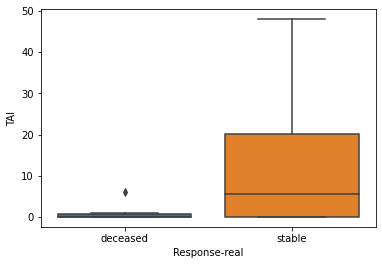

In [11]:
sns.boxplot(x='Response-real', y='TAI', data=inform_known_response)

In [12]:
stats.ttest_ind(inform_stable['TAI'], inform_deceased['TAI'], equal_var=False)

Ttest_indResult(statistic=1.1889451456615616, pvalue=0.31886517839601425)

#### LOH

<AxesSubplot:xlabel='Response-real', ylabel='LOH'>

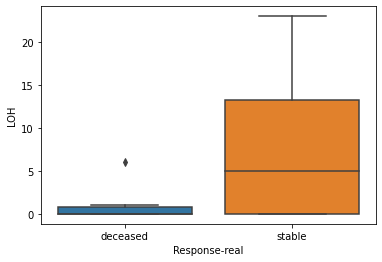

In [13]:
sns.boxplot(x='Response-real', y='LOH', data=inform_known_response)

In [14]:
stats.ttest_ind(inform_stable['LOH'], inform_deceased['LOH'], equal_var=False)

Ttest_indResult(statistic=1.278607566156202, pvalue=0.2860008275320764)

#### LST_11Mb

<AxesSubplot:xlabel='Response-real', ylabel='LST_11Mb'>

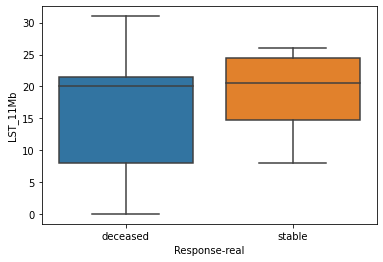

In [15]:
sns.boxplot(x='Response-real', y='LST_11Mb', data=inform_known_response)

In [16]:
stats.ttest_ind(inform_stable['LST_11Mb'], inform_deceased['LST_11Mb'], equal_var=False)

Ttest_indResult(statistic=0.4102237717211921, pvalue=0.6924896703530292)

#### LST_10Mb

<AxesSubplot:xlabel='Response-real', ylabel='LST_10Mb'>

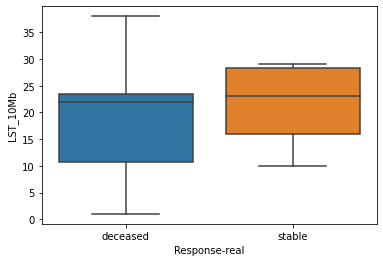

In [17]:
sns.boxplot(x='Response-real', y='LST_10Mb', data=inform_known_response)

In [18]:
stats.ttest_ind(inform_stable['LST_10Mb'], inform_deceased['LST_10Mb'], equal_var=False)

Ttest_indResult(statistic=0.32046264417857045, pvalue=0.7568709648692061)

#### HRD_11

<AxesSubplot:xlabel='Response-real', ylabel='HRD_11'>

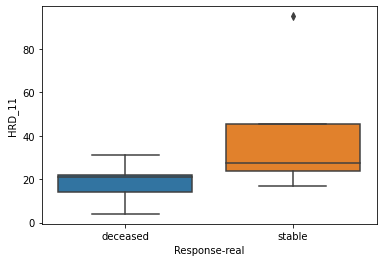

In [19]:
sns.boxplot(x='Response-real', y='HRD_11', data=inform_known_response)

In [20]:
stats.ttest_ind(inform_stable['HRD_11'], inform_deceased['HRD_11'], equal_var=False)

Ttest_indResult(statistic=1.2682420873163633, pvalue=0.28740997145848673)

#### HRD_10

<AxesSubplot:xlabel='Response-real', ylabel='HRD_10'>

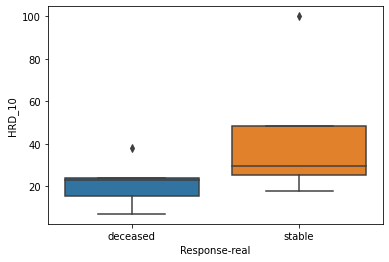

In [21]:
sns.boxplot(x='Response-real', y='HRD_10', data=inform_known_response)

In [22]:
stats.ttest_ind(inform_stable['HRD_10'], inform_deceased['HRD_10'], equal_var=False)

Ttest_indResult(statistic=1.188215962382784, pvalue=0.3126546187761141)

Na všetkých boxplotoch možno vidieť, že pacienti, u ktorých nastala po nasadení liečby PARPi stabilizácia ochorenia, dosahujú o niečo vyššie hodnoty jednotlivých metrík. Rozdiely medzi skupinami však nepotvrdili štatistické testy, ktoré nedokázali vyvrátiť že skupiny majú rovnaký priemer hodnôt jednotlivých atribútov, čo bolo zrejme spôsobené veľmi malým množstvom dát.

### Klasifikácia

In [23]:
inform_known_response.loc[inform_known_response['Response-real'] == 'deceased', 'Response-real numeric'] = 0
inform_known_response.loc[inform_known_response['Response-real'] == 'stable', 'Response-real numeric'] = 1

inform_known_response

/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,Age,Response-real,Response-cell lines,Response-real numeric
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.023299,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,18.0,deceased,negative,0.0
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.045612,0,0,91,70,59,45,40,31,29,24,20,20,24,29,31,19.0,deceased,negative,0.0
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,19.0,deceased,negative,0.0
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048072,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,20.0,deceased,negative,0.0
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,NaN,deceased,positive,0.0
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,NaN,stable,negative,1.0
10,P07/P7.MS.00A.WGS_events.txt,P07/P07.MS_00A.WGS.Source.vcf.gz,MS_00A.T,0.967578,0,0,92,72,57,50,44,31,30,28,26,26,28,30,31,NaN,stable,negative,1.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,16.0,stable,positive,1.0
27,P24/P24.I062.035.WGS_events.txt,P24/P24.I062.035.WGS.Source.vcf.gz,I062_035_2M1_D1,1.000028,6,6,2,1,1,1,1,1,1,1,0,12,13,13,13,NaN,deceased,negative,0.0
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,14.0,stable,positive,1.0


In [24]:
def predict(data, treshold):
    y_pred = []
    for record in data:
        if record > treshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return y_pred

In [25]:
def find_best_treshold(data, y_true, tresholds):
    best_treshold = -1
    best_score = 0
    
    for treshold in tresholds:
        y_pred = predict(data, treshold)
        
        score = f1_score(y_true, y_pred)
        if(score > best_score):
            best_treshold = treshold
            best_score = score
            
    return best_treshold, best_score

In [26]:
y_true = inform_known_response['Response-real numeric'].tolist()

#### LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

In [27]:
LST_10_treshold = 11

In [28]:
data_LST_10 = inform_known_response['LST_10Mb'].tolist()

<AxesSubplot:>

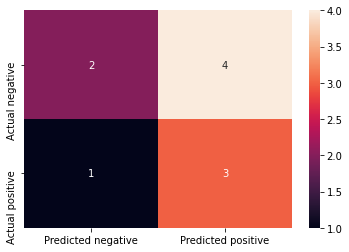

In [29]:
y_pred_LST_10 = predict(data_LST_10, LST_10_treshold)

cm = confusion_matrix(y_true, y_pred_LST_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [30]:
f1_score(y_true, y_pred_LST_10)

0.5454545454545454

##### Pokus o nájdenie najoptimálnejšieho LST_10Mb hraničného skóre

In [31]:
best_LST_10_treshold, best_LST_10_f1_score = find_best_treshold(data_LST_10, y_true, [x for x in range(7, 15)])

best_LST_10_treshold, best_LST_10_f1_score

(7, 0.6666666666666666)

Na našich dátach sa ukázalo ako optimálne hraničné skóre metriky LST 10Mb hodnota 7.

Skúsime si vizualizovať výsledky pri použití hraničného skóre 7.

<AxesSubplot:>

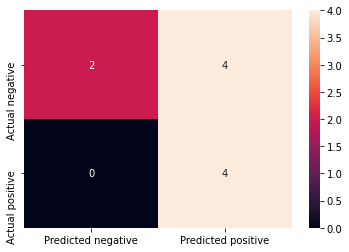

In [32]:
y_pred_LST_10_best = predict(data_LST_10, best_LST_10_treshold)

cm = confusion_matrix(y_true, y_pred_LST_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

##### HRD s LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

In [33]:
HRD_10_treshold = 42

In [34]:
data_HRD_10 = inform_known_response['HRD_10'].tolist()

<AxesSubplot:>

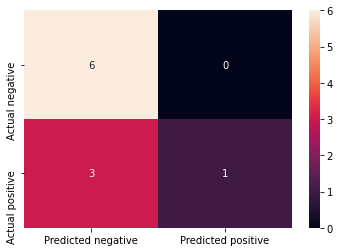

In [35]:
y_pred_HRD_10 = predict(data_HRD_10, HRD_10_treshold)

cm = confusion_matrix(y_true, y_pred_HRD_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [36]:
f1_score(y_true, y_pred_HRD_10)

0.4

Vzhľadom na to že hranica 42 je pri našich dátach pomerne vysoká, metóda pri tejto hranici nedokázala dobre zaklasifikovať tumory.

Vyskúšame klasifikáciu s nižšími hraničnými hodnotami.

##### 90 percentil ako HRD_10 hraničné skóre

In [37]:
HRD_10_treshold_2 = np.percentile(results_inform['HRD_10'], 90)

In [38]:
HRD_10_treshold_2 = 33

<AxesSubplot:>

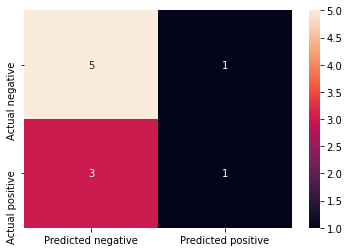

In [39]:
y_pred_HRD_10_2 = predict(data_HRD_10, HRD_10_treshold_2)

cm = confusion_matrix(y_true, y_pred_HRD_10_2)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [48]:
f1_score(y_true, y_pred_HRD_10_2)

0.3333333333333333

Pri použití 90 percentilu je F1 skóre ešte nižšie.

##### Pokus o nájdenie najoptimálnejšieho HRD_10 hraničného skóre

In [51]:
best_HRD_10_treshold, best_HRD_10_f1_score = find_best_treshold(data_HRD_10, y_true, [x for x in range(25, 42)])

best_HRD_10_treshold, best_HRD_10_f1_score

(25, 0.75)

<AxesSubplot:>

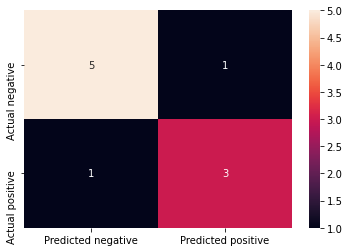

In [41]:
y_pred_HRD_10_best = predict(data_HRD_10, best_HRD_10_treshold)

cm = confusion_matrix(y_true, y_pred_HRD_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

Ako najlepšie klasifikujúce hraničné HRD skóre sa ukázala byť hodnota 25.

Vyzerá, že HRD klasifikuje lepšie ako LST 10Mb.

Vzhľadom na celkovú distribúciu hodnôt metrík TAI a LOH nevyzerá, že by mohli byť úspešné ako samostatné metódy. Napriek tomu podobne ako pri predošlých algoritmoch skúsime vyhodnotiť a optimalizovať klasifikáciu pomocou týchto metód. 

##### LOH

In [42]:
data_LOH = inform_known_response['LOH'].tolist()

In [43]:
best_LOH_treshold, best_LOH_f1_score = find_best_treshold(data_LOH, y_true, [x for x in range(0, 11)])

best_LOH_treshold, best_LOH_f1_score

(6, 0.6666666666666666)

<AxesSubplot:>

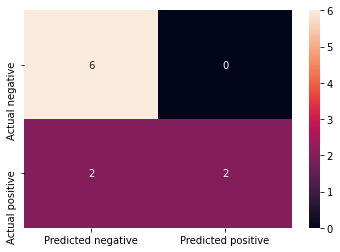

In [44]:
y_pred_LOH_best = predict(data_LOH, best_LOH_treshold)

cm = confusion_matrix(y_true, y_pred_LOH_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

##### TAI

In [45]:
data_TAI = inform_known_response['TAI'].tolist()

In [46]:
best_TAI_treshold, best_TAI_f1_score = find_best_treshold(data_TAI, y_true, [x for x in range(0, 11)])

best_TAI_treshold, best_TAI_f1_score

(6, 0.6666666666666666)

<AxesSubplot:>

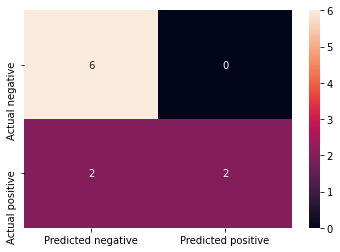

In [47]:
y_pred_TAI_best = predict(data_TAI, best_TAI_treshold)

cm = confusion_matrix(y_true, y_pred_TAI_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

Ako optimálne hraničné skóre sa ukázala byť hodnota 6 pri oboch metrikách. Avšak tieto hodnoty sú zrejme vzhľadom na veľmi malé množstvo dát skreslené.

#### Analýza pozitívnych pacientov

In [52]:
inform_stable = inform_known_response.loc[inform_known_response['Response-real'] == 'stable']

inform_stable

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,Age,Response-real,Response-cell lines,Response-real numeric
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,NaN,stable,negative,1.0
10,P07/P7.MS.00A.WGS_events.txt,P07/P07.MS_00A.WGS.Source.vcf.gz,MS_00A.T,0.967578,0,0,92,72,57,50,44,31,30,28,26,26,28,30,31,NaN,stable,negative,1.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,16.0,stable,positive,1.0
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,14.0,stable,positive,1.0


Pozrieme sa na pacientov, ktorých HRD_10 zaklasifikovalo ako pozitívnych a LST 10Mb ako negatívnych.

In [53]:
inform_stable.loc[(inform_stable['HRD_10'] > best_HRD_10_treshold) & (inform_stable['LST_10Mb'] <= best_LST_10_treshold)]

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,Age,Response-real,Response-cell lines,Response-real numeric


Vidíme, že takýto pacienti neexistujú.

Teraz sa naopak pozrieme na pacientov, ktorých LST 10Mb zaklasifikovalo ako pozitívnych a HRD 10 ako negatívnych

In [54]:
inform_stable.loc[(inform_stable['HRD_10'] <= best_HRD_10_treshold) & (inform_stable['LST_10Mb'] > best_LST_10_treshold)]

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,Age,Response-real,Response-cell lines,Response-real numeric
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.12449,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,NaN,stable,negative,1.0


In [55]:
inform_stable.loc[(inform_stable['HRD_10'] > best_HRD_10_treshold) & (inform_stable['LST_10Mb'] > best_LST_10_treshold)]

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,Age,Response-real,Response-cell lines,Response-real numeric
10,P07/P7.MS.00A.WGS_events.txt,P07/P07.MS_00A.WGS.Source.vcf.gz,MS_00A.T,0.967578,0,0,92,72,57,50,44,31,30,28,26,26,28,30,31,NaN,stable,negative,1.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,16.0,stable,positive,1.0
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,14.0,stable,positive,1.0


Už iba samotné LST 10Mb dokázalo správne zaklasifikovať všetkých pozitívnych pacientov, pričom HRD 10 v jednom prípade dokonca nesprávne zaklasifikovalo pozitívneho pacienta.